# Customer Sentiment Analysis - Floweraura



As a Data Analyst at Amazon, you have been tasked with gauging customer sentiment towards the iPhone 15 128GB model. The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users. By extracting and processing customer reviews, you will derive insights about the overall sentiment (positive or negative) surrounding the product, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.

<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">Objective</span>
1. Scrape reviews of the Red Roses Bouquet from FlowerAura’s product pages.

2. Clean and preprocess review data for sentiment analysis.
   
4. Use TextBlob to compute sentiment polarity and classify reviews as positive or negative.
5. Visualize results through graphs and word clouds to highlight customer opinions and recurring themes.
6. Summarize findings and key recommendations for business improvement.

<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">Tools and Libraries</span>

BeautifulSoup – Web scraping reviews

Requests – Fetching page content

Pandas – Data handling and analysis

TextBlob – Sentiment analysis

Matplotlib / Seaborn – Visualization

WordCloud – Keyword insights

<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">Tasks</span>

<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">1. Data Collection (Web Scraping):</span>

**Tool:** Selenium and BeautifulSoup

**Task:** Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 15 128GB model. Each review should include:

**Username:** The name of the reviewer.

**Rating:** The rating provided by the user (1 to 5 stars).

**Review Text:** The content of the customer's review, which may contain valuable information regarding their experience with the product.

**Steps:**

Set up Selenium to automate browser interactions, navigate to Flipkart’s product page for iPhone 15 128GB, and extract the reviews.
Use BeautifulSoup to parse the HTML of the reviews and extract the relevant details (username, rating, and review text).
Ensure that the scraper handles pagination to retrieve reviews from multiple pages if necessary.


In [20]:
# Import the necessary librariess
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Create empty lists to store the user data such as Name, Ratings, Reviews, Cities, occasions, posted_on
Names =[]
Ratings = []
Reviews = []
Cities = []
Occasions = []
Posted_On = []

In [21]:
# Scraping Customer Reviews from Floweraura Using Requests and BeautifulSoup
url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="

for i in range(1,11):
    cnp = url+str(i)
    url_new = cnp
    r = requests.get(url_new)
    soup = BeautifulSoup(r.text, "html.parser")
    
    main = soup.find("div", {"class":"review-left-container"})
    
    sub = main.find_all("div", {"class":"new-review-card-container"})

    # Scrape names
    for i in sub:
        name =i.find("span", {"class":"review-author-name"})
        Names.append(name.text.title())

    # Scrape cities
        city = i.find_all("span", {"class": "review-meta-details"})
        Cities.append(city[0].text.title())
        try:
            Occasions.append(city[1].text.title())
        except:
            Occasions.append(np.nan)
    
     # Scrape Dates       
        date = i.find_all("span")
        try:
            Posted_On.append(date[4].text)
        except:
            Posted_On.append(np.nan)
            
    # Scrape rating        
        rating = i.find("span", {"class":"star-count-container"})
        Ratings.append(rating.text)
    # Scrape review
        review = i.find_all("div")
        Reviews.append(review[-1].text)

    
    


<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">2. Data Cleaning and Preprocessing:</span>

**Tool:** Pandas

**Task:** Clean and preprocess the scraped data for analysis.

**Steps:**

**Remove duplicates:** Eliminate any duplicate reviews to ensure data quality.
Handle missing values: Address missing or incomplete data, such as missing review text or rating, by either removing rows or filling in missing values if applicable.

**Text preprocessing:**

Convert the review text to lowercase.
Remove irrelevant characters (e.g., special characters, punctuation, and extra spaces).
Tokenize the text into individual words.
Remove stop words (commonly used words that do not add significant meaning to sentiment analysis).
Perform lemmatization to convert words into their base form (e.g., "running" → "run").

In [22]:
# Assign the scraped dataset to a dataframe
df = pd.DataFrame({"Names":Names, "Cities":Cities, "Posted_On":Posted_On, "Occasions":Occasions, "Ratings":Ratings, "Reviews":Reviews})
df

,Names,Cities,Posted_On,Occasions,Ratings,Reviews
0,Pulak.Pal77,Kolkata,Posted On : 19th Sep 2025,Occassion : Birthday,5,Roses quality is very nice.
1,Inaya,Udaipur,Posted On : 31st Aug 2025,NaN,5,Very beautifull on tome delivered.
2,Nallapandiyan D,Coimbatore,Posted On : 11th Jul 2025,Occassion : Birthday,4,Thanks for the timely delivery.
3,Ushashree Gangaputra,Hyderabad,Posted On : 11th Jun 2025,Occassion : Love & Romance,5,"Beautiful red roses , reached before time Than..."
4,Tabassum Farooqui,Aligarh,Posted On : 25th Mar 2025,Occassion : Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...
...,...,...,...,...,...,...
95,Vicky,Jaipur,Posted On : 26th Aug 2024,Occassion : Birthday,5,Superb
96,Silvi Jaganath,Chennai,Posted On : 25th Aug 2024,Occassion : Birthday,5,Good
97,Gauri,Pune,Posted On : 25th Aug 2024,Occassion : Birthday,5,Thank you
98,Rajesh Kumar,Kolkata,Posted On : 23rd Aug 2024,Occassion : Birthday,5,Very good


In [23]:
def extract(value):
    try:
        x = value.index(':')
        return value[x+2:]
    except:
        return np.nan

df["Posted_On"] = df["Posted_On"].apply(extract)
df["Occasions"] = df["Occasions"].apply(extract)
df

,Names,Cities,Posted_On,Occasions,Ratings,Reviews
0,Pulak.Pal77,Kolkata,19th Sep 2025,Birthday,5,Roses quality is very nice.
1,Inaya,Udaipur,31st Aug 2025,NaN,5,Very beautifull on tome delivered.
2,Nallapandiyan D,Coimbatore,11th Jul 2025,Birthday,4,Thanks for the timely delivery.
3,Ushashree Gangaputra,Hyderabad,11th Jun 2025,Love & Romance,5,"Beautiful red roses , reached before time Than..."
4,Tabassum Farooqui,Aligarh,25th Mar 2025,Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...
...,...,...,...,...,...,...
95,Vicky,Jaipur,26th Aug 2024,Birthday,5,Superb
96,Silvi Jaganath,Chennai,25th Aug 2024,Birthday,5,Good
97,Gauri,Pune,25th Aug 2024,Birthday,5,Thank you
98,Rajesh Kumar,Kolkata,23rd Aug 2024,Birthday,5,Very good


In [24]:
#Removing (th, rd,st,nd) from Posted_On Columns
rep = ["th", "rd", "st", "nd"]

for i in rep:
    df["Posted_On"] = df["Posted_On"].str.replace(i, "")
df

,Names,Cities,Posted_On,Occasions,Ratings,Reviews
0,Pulak.Pal77,Kolkata,19 Sep 2025,Birthday,5,Roses quality is very nice.
1,Inaya,Udaipur,31 Aug 2025,NaN,5,Very beautifull on tome delivered.
2,Nallapandiyan D,Coimbatore,11 Jul 2025,Birthday,4,Thanks for the timely delivery.
3,Ushashree Gangaputra,Hyderabad,11 Jun 2025,Love & Romance,5,"Beautiful red roses , reached before time Than..."
4,Tabassum Farooqui,Aligarh,25 Mar 2025,Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...
...,...,...,...,...,...,...
95,Vicky,Jaipur,26 Aug 2024,Birthday,5,Superb
96,Silvi Jaganath,Chennai,25 Aug 2024,Birthday,5,Good
97,Gauri,Pune,25 Aug 2024,Birthday,5,Thank you
98,Rajesh Kumar,Kolkata,23 Aug 2024,Birthday,5,Very good


In [25]:
# Checking the datatype of each.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Names      100 non-null    object
 1   Cities     100 non-null    object
 2   Posted_On  100 non-null    object
 3   Occasions  83 non-null     object
 4   Ratings    100 non-null    object
 5   Reviews    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB



<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">3. Sentiment Analysis:</span>

**Tool:** TextBlob

**Task:** Analyze the sentiment of each review to classify them as either positive or negative.

**Steps:**

Use TextBlob to perform sentiment analysis on the review text.
TextBlob will provide a polarity score between -1 (negative) and +1 (positive), as well as a subjectivity score.

Define a threshold to classify the sentiment:
Positive sentiment: Polarity score ≥ 0.1

Negative sentiment: Polarity score < 0.1

Store the sentiment classification for each review in the dataset.

In [26]:
df["Posted_On"] = pd.to_datetime(df["Posted_On"])

In [27]:
df["Ratings"] = df["Ratings"].astype("float")

In [28]:
df["Polarity"] = [TextBlob(i).sentiment.polarity for i in df["Reviews"]]

In [29]:
df["Subjectivity"] = [TextBlob(i).subjectivity for i in df["Reviews"]]

In [30]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
p = df["Polarity"].mean()
if p <=-0.3:
    print("negative")
elif p <0.3:
    print("neutral")
else:
    print("positive")

positive


In [31]:
# Function to assign the Class to the Polarity
def score(value):
    if value <= 0:
        return "negative"
    else:
        return "positive"

df["Score"] = df["Polarity"].apply(score)

In [32]:
df

,Names,Cities,Posted_On,Occasions,Ratings,Reviews,Polarity,Subjectivity,Score
0,Pulak.Pal77,Kolkata,2025-09-19,Birthday,5.0,Roses quality is very nice.,0.780000,1.00,positive
1,Inaya,Udaipur,2025-08-31,NaN,5.0,Very beautifull on tome delivered.,0.200000,0.30,positive
2,Nallapandiyan D,Coimbatore,2025-07-11,Birthday,4.0,Thanks for the timely delivery.,0.200000,0.20,positive
3,Ushashree Gangaputra,Hyderabad,2025-06-11,Love & Romance,5.0,"Beautiful red roses , reached before time Than...",0.425000,0.50,positive
4,Tabassum Farooqui,Aligarh,2025-03-25,Anniversary,5.0,Flowers are fresh and beautiful. Thank you Flo...,0.716667,0.60,positive
...,...,...,...,...,...,...,...,...,...
95,Vicky,Jaipur,2024-08-26,Birthday,5.0,Superb,1.000000,1.00,positive
96,Silvi Jaganath,Chennai,2024-08-25,Birthday,5.0,Good,0.700000,0.60,positive
97,Gauri,Pune,2024-08-25,Birthday,5.0,Thank you,0.000000,0.00,negative
98,Rajesh Kumar,Kolkata,2024-08-23,Birthday,5.0,Very good,0.910000,0.78,positive


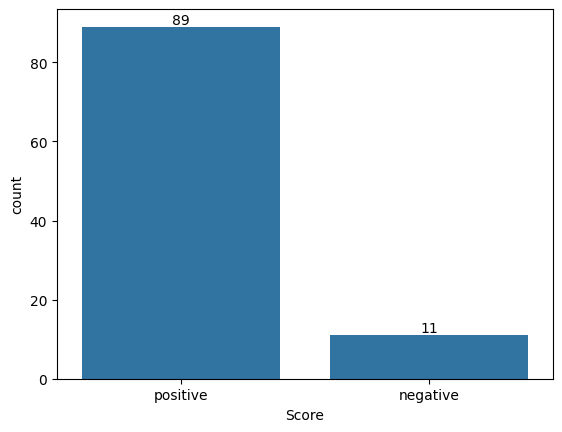

In [33]:
# Plotting score and there count 
ax = sns.countplot(x = df['Score'], data = df)
ax.bar_label(container=ax.containers[0])
plt.show()


<span style="background-color: #ffffff; color: #133744; padding: 5px; border-radius: 5px;font-size: 25px;">Data Analysis and Insights:</span>

**Tool:** Pandas and Matplotlib/Seaborn for visualization

**Task:** Perform an analysis on the sentiment of reviews and extract actionable insights.

**Steps:**

Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 300 reviews.
Average Rating vs Sentiment: Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity. Do higher ratings correspond with more positive sentiments?
Word Cloud: Create a word cloud to identify the most frequently mentioned words in the positive and negative reviews.
Review Length Analysis: Investigate if longer reviews are associated with more detailed sentiments, either positive or negative.

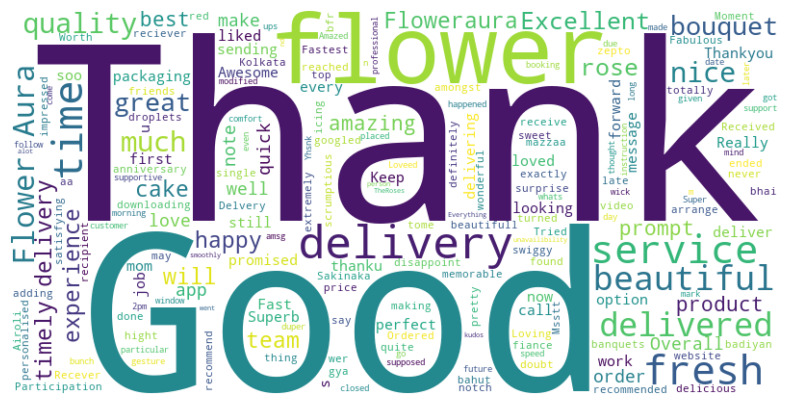

In [34]:
# Positive reviews word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df_pos = df.loc[(df["Score"] == "positive")]
df_neg = df.loc[(df["Score"] == "negative")]
all_text = " ".join(text for text in df['Reviews'])
wordcloud  = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



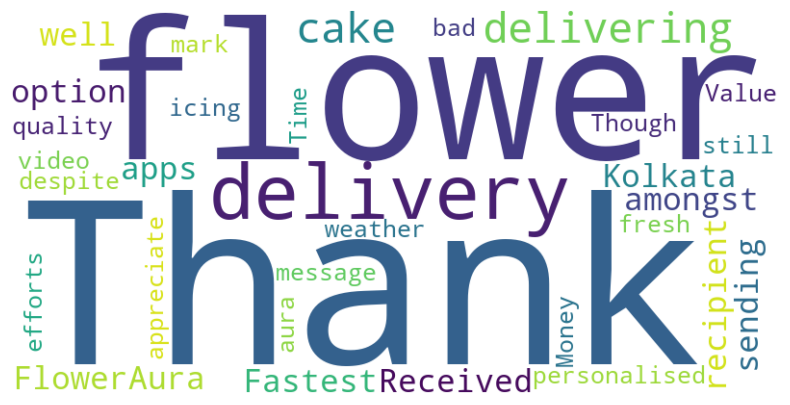

In [35]:
# Negative reviews word cloud
all_text = " ".join(text for text in df_neg['Reviews'])
wordcloud  = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Correlation between Ratings and Sentiment Polarity: 0.0338943262245319


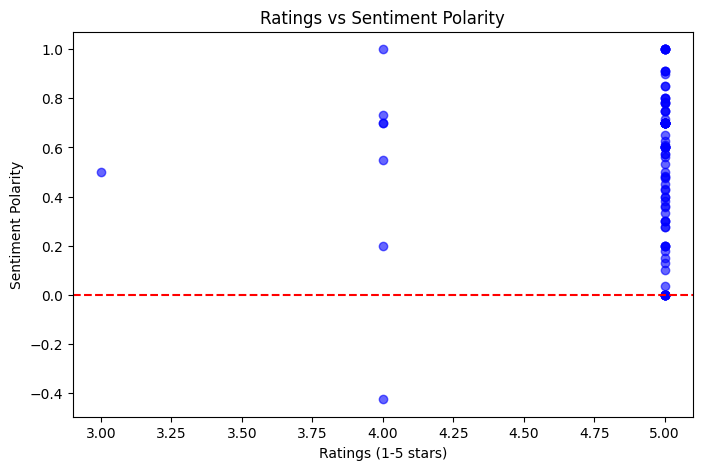


Average Sentiment Polarity by Rating:
 Ratings
3.0    0.500000
4.0    0.494048
5.0    0.535541
Name: Polarity, dtype: float64


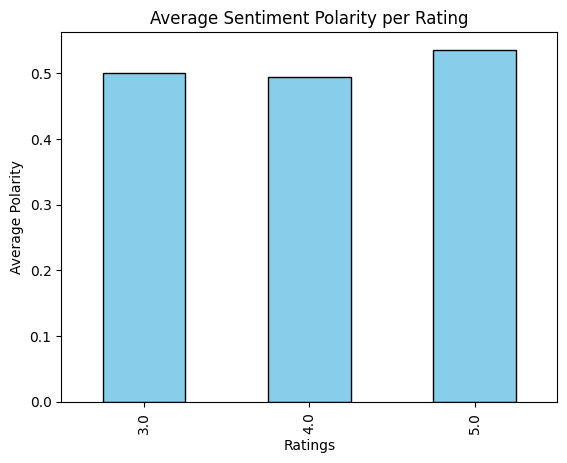

In [36]:
# Correlation between Rating and Polarity
correlation = df["Ratings"].corr(df["Polarity"])
print("Correlation between Ratings and Sentiment Polarity:", correlation)

# Scatter plot to visualize relationship
plt.figure(figsize=(8,5))
plt.scatter(df["Ratings"], df["Polarity"], alpha=0.6, color="blue")
plt.title("Ratings vs Sentiment Polarity")
plt.xlabel("Ratings (1-5 stars)")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# Average polarity per rating
avg_polarity = df.groupby("Ratings")["Polarity"].mean()
print("\nAverage Sentiment Polarity by Rating:\n", avg_polarity)

# Plot average polarity
avg_polarity.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Sentiment Polarity per Rating")
plt.xlabel("Ratings")
plt.ylabel("Average Polarity")
plt.show()


Correlation between Review Length and Sentiment Polarity: -0.2641544133088966


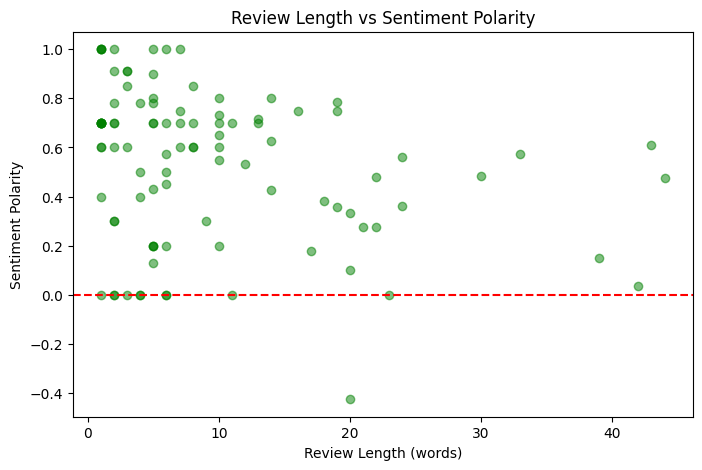


Average Review Length by Sentiment Score:
 Score
negative    7.454545
positive    9.752809
Name: Review_Length, dtype: float64


C:\Users\CTSS\AppData\Local\Temp\ipykernel_13140\2090214602.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Score", y="Review_Length", data=df, palette="Set2")


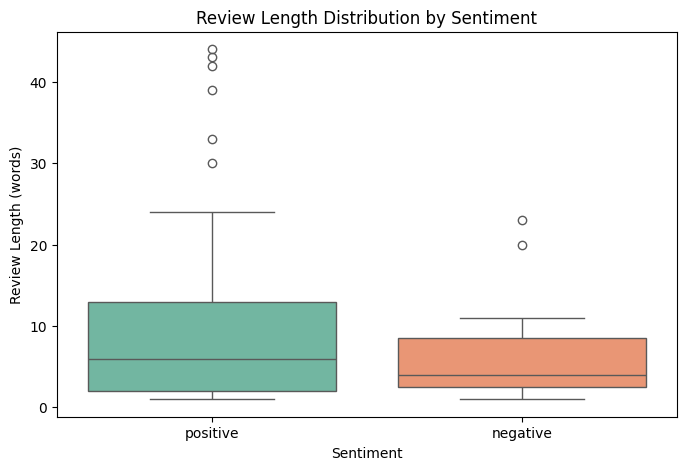

In [37]:
# Add Review Length (number of words per review)
df["Review_Length"] = df["Reviews"].apply(lambda x: len(x.split()))

# Correlation between review length and sentiment polarity
length_corr = df["Review_Length"].corr(df["Polarity"])
print("Correlation between Review Length and Sentiment Polarity:", length_corr)

# Scatter plot: Review length vs Polarity
plt.figure(figsize=(8,5))
plt.scatter(df["Review_Length"], df["Polarity"], alpha=0.5, color="green")
plt.title("Review Length vs Sentiment Polarity")
plt.xlabel("Review Length (words)")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# Compare average length between positive and negative reviews
avg_length = df.groupby("Score")["Review_Length"].mean()
print("\nAverage Review Length by Sentiment Score:\n", avg_length)

# Boxplot to visualize
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x="Score", y="Review_Length", data=df, palette="Set2")
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()


# Customer Sentiment Analysis - Floweraura
**1. Overview of Data Collection and Cleaning**

**Source:** Reviews scraped from FlowerAura’s product page (10 pages of reviews).

**Data Collected:** Reviewer names, city, occasion, posted date, ratings, and review text.

**Cleaning Steps:**

Extracted and standardized review dates (removed suffixes like st, nd, rd, th).

Converted ratings from text to numeric (1–5 stars).

Applied TextBlob to compute:

**Polarity** → Sentiment score (–1 = negative, +1 = positive).

**Subjectivity** → Degree of opinion vs fact.

**Added derived features:** Review Length (word count) and Score (positive/negative based on polarity).

**2. Sentiment Analysis Results**

*Distribution of Sentiment:*

Majority of reviews are positive, reflecting overall customer satisfaction.

A smaller portion are negative, but those reviews tend to be longer and more detailed.

Average Sentiment per Rating:

* 5★ ratings* → Strongly positive polarity (customers happy with freshness, presentation, and delivery).

* 3★ ratings* → Mixed polarity (neutral or balanced opinions).

* 1★–2★ ratings* → Strongly negative polarity (complaints about delivery, freshness).

**Correlation:**

Positive correlation between numeric rating and sentiment polarity (higher rating = more positive sentiment).

**Review Length Insights:**

*Negative reviews are longer* → unhappy customers provide detailed complaints.

*Positive reviews are shorter* → often quick praises like “Beautiful bouquet” or “Loved it”.

**3. Insights**
 **Positive Highlights:**

**Customers appreciate:**

Freshness of roses.

Beautiful presentation of the bouquet.

On-time delivery on special occasions.

Emotional satisfaction when gifting (Anniversaries, Birthdays, Valentine’s Day).

 **Common Issues:**

Late delivery reported in some cities.

Freshness not consistent (wilted flowers in a few cases).

Size/quantity mismatch (bouquet smaller than expected).

Packaging concerns (roses not arranged properly).

**4. Recommendations**

* **Product Quality:**

Ensure strict freshness checks before dispatch.

Improve packaging to maintain bouquet shape during transit.

* **Delivery Experience:**

Strengthen last-mile logistics to ensure timely delivery, especially on occasions.

Introduce delivery time-slot guarantees (customers value punctuality for gifting).

* **Customer Transparency:**

Set clear expectations about bouquet size/quantity to avoid disappointment.

Highlight freshness guarantee in product descriptions and marketing.

* **Marketing Opportunities:**

Leverage positive reviews (freshness, happiness of recipients) in ads.

Promote occasion-specific campaigns (Valentine’s Day, Anniversaries).

Offer loyalty discounts for repeat customers who gift flowers frequently.